In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import trimesh
import random
import sys

sys.path.append(str(Path("..").resolve()))
from src import *

# Regenerate the UV Maps

##### ℹ️ This notebook requires some ShapeNetCore samples in the `dataset/shapenet/objects` folder. It also requires the `statistics.parquet`.

The dataset generated so far is quite poor. The UV maps often lack the interesting patterns needed to guide the diffusion process with ControlNet. This is expecially true for ShapeNetCore samples.

In this notebook we ask if we can regenerate the UV Maps using Blender _Smart UV Project_ function, while preserving the effective texture mapping.

## ShapeNetCore

In [2]:
dataset = ShapeNetCoreDataset3D()
stats = dataset.statistics
uids = stats[(stats["valid"])].index

In [3]:
UID = uids[random.randint(0, len(uids) - 1)]
# UID = "374fe2584abb594da094848ea4d06501"
print(UID)
obj = dataset[UID]
trimesh.load(obj.path).show()

f99ebf0f053140525a0e5699b3040a35


0it [00:00, ?it/s]

55it [00:00, 223.31it/s]


20:00:10 | INFO: Data are loaded, start creating Blender stuff


[05/24/25 20:00:10] INFO     Data are loaded, start creating Blender stuff

20:00:10 | INFO: Blender create Mesh node material_1_24


                    INFO     Blender create Mesh node material_1_24

20:00:10 | INFO: Blender create Mesh node material_0_1_8


                    INFO     Blender create Mesh node material_0_1_8

20:00:10 | INFO: glTF import finished in 0.03s


                    INFO     glTF import finished in 0.03s

Info: Removed 901 vertices


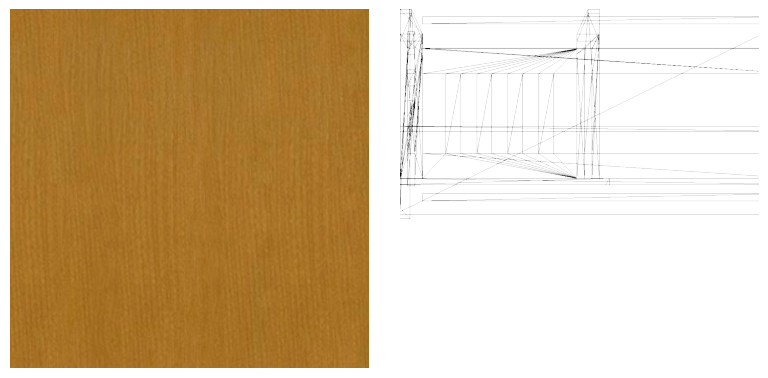

In [4]:
tex, uv = obj.textures[0], obj.draw_uv_map()
plot_images([tex, uv], cols=2, size=4)

Fra:1 Mem:28.06M (Peak 28.06M) | Time:485586:00:48.95 | Mem:0.00M, Peak:0.00M | Scene | Synchronizing object | material_0_1_8
Fra:1 Mem:28.13M (Peak 28.13M) | Time:485586:00:48.95 | Mem:0.00M, Peak:0.00M | Scene | Initializing
Fra:1 Mem:28.13M (Peak 28.13M) | Time:485586:00:48.95 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture.001
Fra:1 Mem:28.13M (Peak 28.13M) | Time:485586:00:48.95 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading Image_0
Fra:1 Mem:28.13M (Peak 28.13M) | Time:485586:00:48.95 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture
Info: Baking map saved to internal image, save it externally or pack it


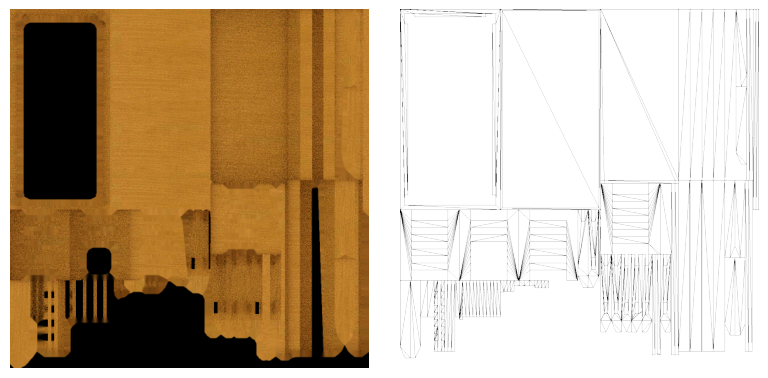

In [6]:
new_tex, new_uv = obj.regenerate_uv_map(bake_type="GLOSSY", samples=8, device="CPU")
plot_images([new_tex, new_uv], cols=2, size=4)

In [ ]:
renderings = obj.render(views=4)

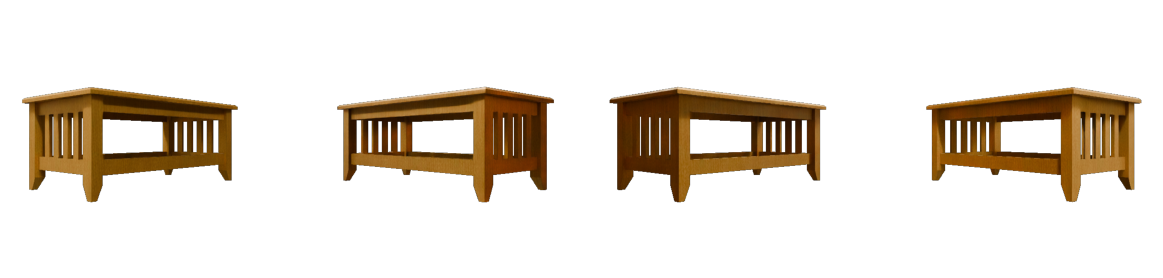

In [8]:
plot_images(renderings,size=3)

## Objaverse

In [2]:
dataset = ObjaverseDataset3D()
stats = dataset.statistics
uids = stats[(stats["valid"])].index

In [ ]:
UID = uids[random.randint(0, len(uids) - 1)]
UID = "4faf118e1d4442868b9fe746cc1772f4"
obj = dataset[UID]
# trimesh.load(obj.path).show()

In [4]:
obj.export(Path('./scene.blend').resolve())

Info: Saved "scene.blend"


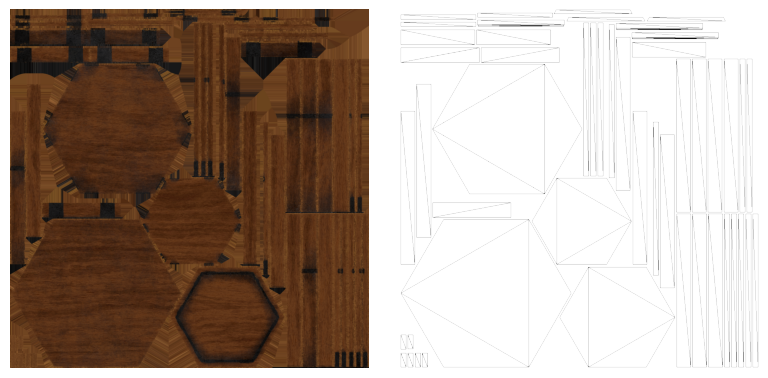

In [21]:
tex, uv = obj.textures[0], obj.draw_uv_map()
plot_images([tex, uv], cols=2, size=4)

Fra:1 Mem:36.86M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Synchronizing object | OPM0038_OPM0038_0
Fra:1 Mem:36.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Initializing
Fra:1 Mem:36.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture.003
Fra:1 Mem:36.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading Image_0
Fra:1 Mem:41.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture
Fra:1 Mem:42.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture.001
Info: Baking map saved to internal image, save it externally or pack it


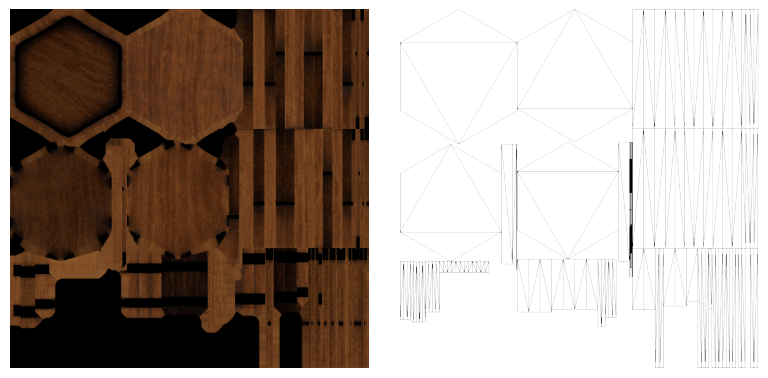

In [8]:
new_tex, new_uv = obj.regenerate_uv_map(samples=16)
plot_images([new_tex, new_uv], cols=2, size=4)

In [ ]:
renderings = obj.render(views=4)

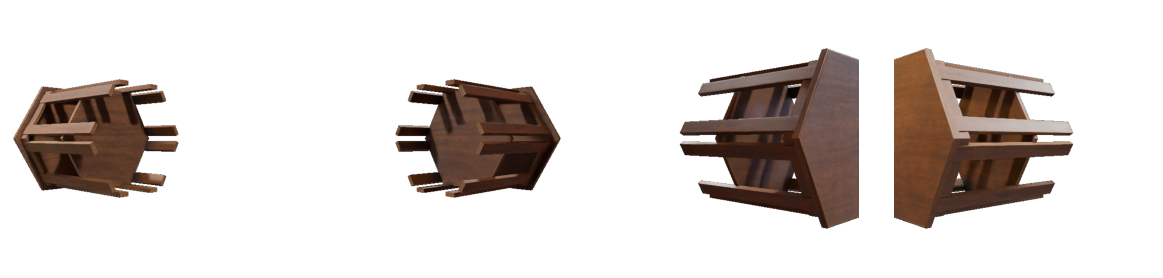

In [10]:
plot_images(renderings, size=3)